### Sentiment Analysis on Sephora Product Reviews: Modeling
In this notebook I will be testing out three models: Naive Bayes, Logistic Regression, and Decision Tree to see which performs the best.  Once I have determined which model performs the best through various metrics I will create a function that can predict whether reviews that are input into the function are recommending the product or not.  I will also be looking at the features that drive model performance.

There were some clear features that divided reviews in recommending vs not recommending products.  Some of the negative features included 'alcohol', 'alright', 'allergy', and 'animal' (animal possibly refering to animal testing).  Some of the postive features included 'amazing', 'affordable', 'antioxidant', 'accurate', and 'actually'.  When thinking about how reviews are worded as well as the features that many people look for or look to avoid in products, these features make sense.

In [1]:
# import libraries

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import scikitplot as skplt

import pickle

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import train/test set from pickle

pkl_filename = "x_train.pkl"
with open(pkl_filename, 'rb') as file:
    x_train = pickle.load(file)

pkl_filename = "x_test.pkl"
with open(pkl_filename, 'rb') as file:
    x_test = pickle.load(file)
    
pkl_filename = "y_train.pkl"
with open(pkl_filename, 'rb') as file:
    y_train = pickle.load(file)
    
pkl_filename = "y_test.pkl"
with open(pkl_filename, 'rb') as file:
    y_test = pickle.load(file)
    
pkl_filename = "tfidf_vectorizer.pickle"
with open(pkl_filename, 'rb') as file:
    vect = pickle.load(file)

In [4]:
# start with the dummy model

clf_dummy = DummyClassifier(random_state=42) 
clf_dummy.fit(x_train, y_train)
y_pred = clf_dummy.predict(x_test)

In [5]:
# print accuracy

print("Dummy Classifier using Count vectors Accuracy is {p}%".format(p =round (accuracy_score(y_pred,y_test)*100, 2)))

Dummy Classifier using Count vectors Accuracy is 49.9%


In [6]:
# print classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67     16466
         1.0       0.00      0.00      0.00     16534

    accuracy                           0.50     33000
   macro avg       0.25      0.50      0.33     33000
weighted avg       0.25      0.50      0.33     33000



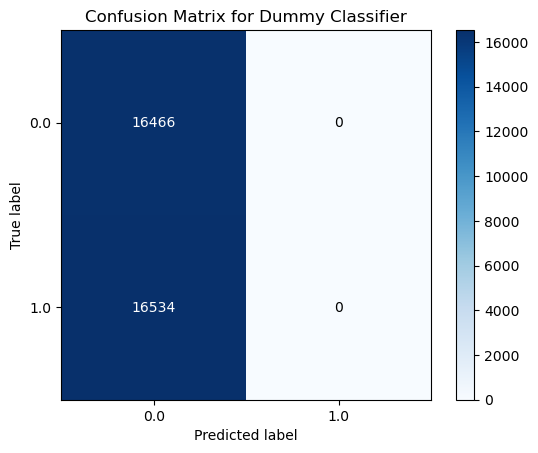

In [7]:
# plot confusion matrix

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, title = 'Confusion Matrix for Dummy Classifier')
plt.show()

In [8]:
# double check values to make sure confusion matrix makes sense

y_train.value_counts(normalize=True)

0.0    0.500507
1.0    0.499493
Name: is_recommended, dtype: float64

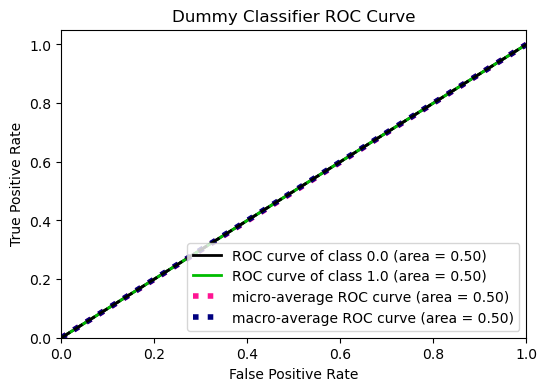

In [9]:
# plot ROC curve

y_pred_proba = clf_dummy.predict_proba(x_test)

skplt.metrics.plot_roc_curve(y_test, y_pred_proba,
                       title="Dummy Classifier ROC Curve", figsize=(6, 4));

In [10]:
# repeat for Naive Bayes

In [11]:
mb=MultinomialNB()
m1=mb.fit(x_train,y_train).predict(x_test)

In [12]:
print("Naive Bayes Model using Count vectors Accuracy is {p}%".format(p =round (accuracy_score(m1,y_test)*100, 2)))

Naive Bayes Model using Count vectors Accuracy is 86.32%


In [13]:
print(classification_report(y_test, m1))

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86     16466
         1.0       0.86      0.86      0.86     16534

    accuracy                           0.86     33000
   macro avg       0.86      0.86      0.86     33000
weighted avg       0.86      0.86      0.86     33000



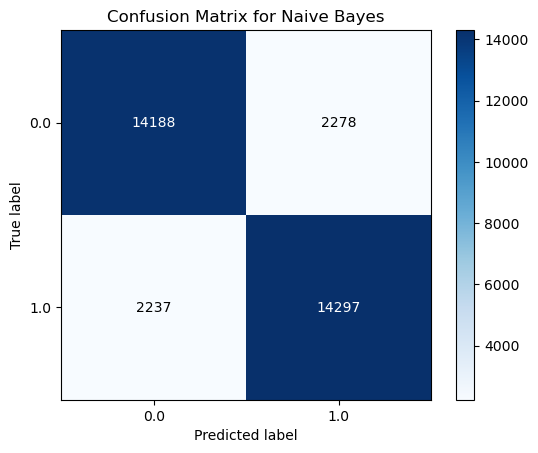

In [14]:
skplt.metrics.plot_confusion_matrix(y_test, m1, normalize=False, title = 'Confusion Matrix for Naive Bayes')
plt.show()

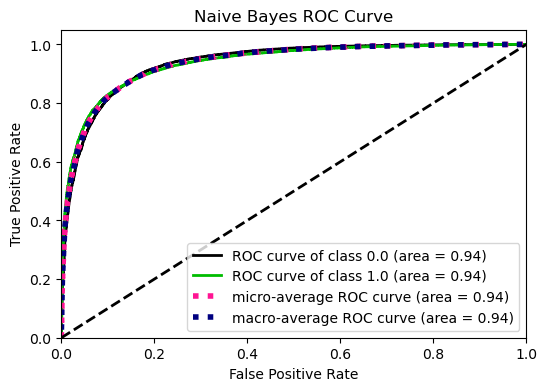

In [15]:
y_pred_proba = mb.predict_proba(x_test)

skplt.metrics.plot_roc_curve(y_test, y_pred_proba,
                       title="Naive Bayes ROC Curve", figsize=(6, 4));

In [16]:
# Logistic Regression

In [17]:
m2 = LogisticRegression()
m2.fit(x_train, y_train)
score = m2.score(x_test,y_test)
y_pred = m2.predict(x_test)

In [18]:
print("Logistic Regression Model using Count vectors Accuracy is {p}%".format(p =round (score*100, 2)))

Logistic Regression Model using Count vectors Accuracy is 88.46%


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89     16466
         1.0       0.89      0.88      0.88     16534

    accuracy                           0.88     33000
   macro avg       0.88      0.88      0.88     33000
weighted avg       0.88      0.88      0.88     33000



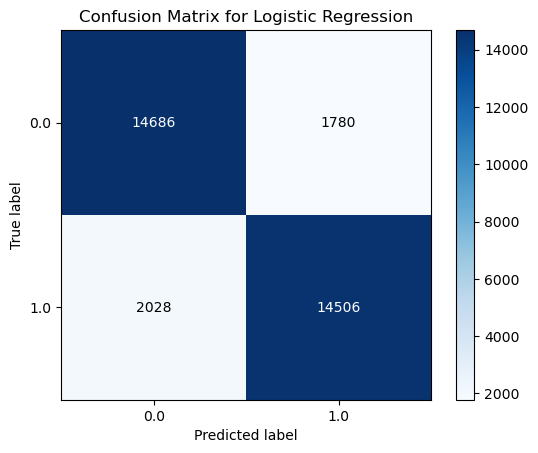

In [20]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, title = 'Confusion Matrix for Logistic Regression')
plt.show()

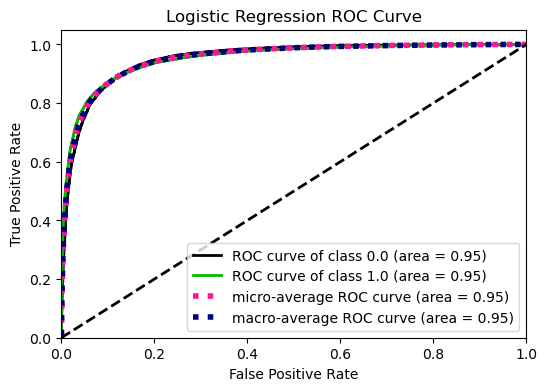

In [21]:
y_pred_proba = m2.predict_proba(x_test)

skplt.metrics.plot_roc_curve(y_test, y_pred_proba,
                       title="Logistic Regression ROC Curve", figsize=(6, 4));

In [22]:
# Decision Tree

In [23]:
d=DecisionTreeClassifier()
d.fit(x_train,y_train)
m3=d.predict(x_test)

In [24]:
print("Decision Tree Model using Count vectors Accuracy is {p}%".format(p =round (accuracy_score(y_test,m3)*100, 2)))

Decision Tree Model using Count vectors Accuracy is 79.29%


In [25]:
print(classification_report(y_test, m3))

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79     16466
         1.0       0.80      0.78      0.79     16534

    accuracy                           0.79     33000
   macro avg       0.79      0.79      0.79     33000
weighted avg       0.79      0.79      0.79     33000



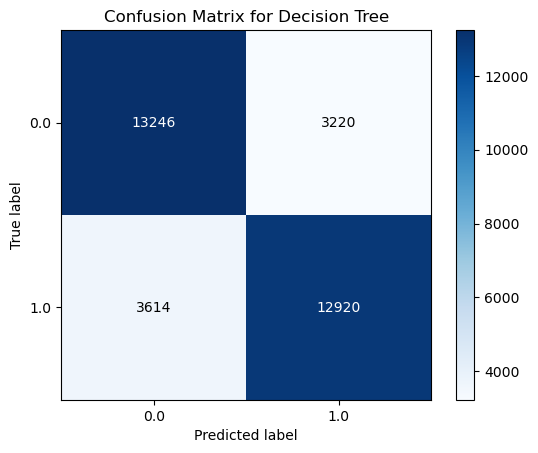

In [26]:
skplt.metrics.plot_confusion_matrix(y_test, m3, normalize=False, title = 'Confusion Matrix for Decision Tree')
plt.show()

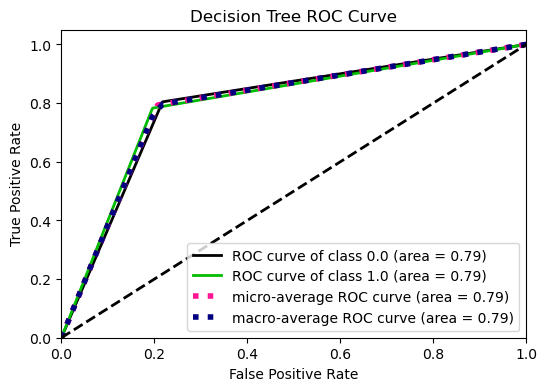

In [27]:
y_pred_proba = d.predict_proba(x_test)

skplt.metrics.plot_roc_curve(y_test, y_pred_proba,
                       title="Decision Tree ROC Curve", figsize=(6, 4));

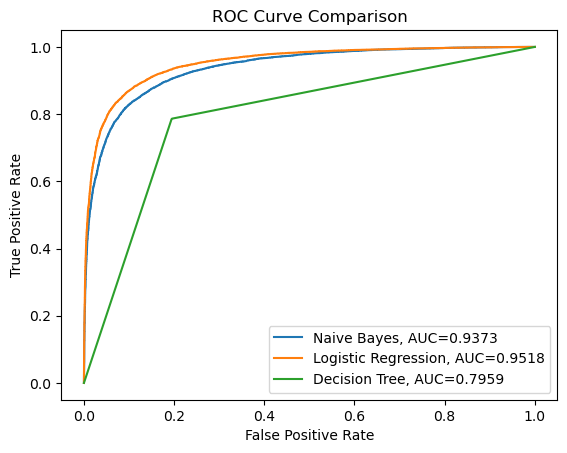

In [28]:
# plot ROC curve comparision between models

plt.figure(0).clf()

mb=MultinomialNB()
m2 = LogisticRegression()
d=DecisionTreeClassifier()

m1=mb.fit(x_train,y_train).predict(x_test)
y_pred_proba = mb.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="Naive Bayes, AUC="+str(auc))

m2.fit(x_train, y_train)
y_pred_proba = m2.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

d.fit(x_train,y_train)
y_pred_proba = d.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [29]:
# get features from tf-idf vectorizer

feature_names = vect.get_feature_names()
importance = m2.coef_[0]
fi = pd.Series(importance)
importance = [(feature_names[i], fi[i]) for i in range(0,2000)]
feature_df = pd.DataFrame(importance)
feature_df.columns = ['feature', 'importance']
feature_df = feature_df.sort_values(by = 'importance')
feature_df = feature_df.reset_index(drop=True)

In [30]:
# these features are associated with a "not recommended" value

feature_df.head(20)

,feature,importance
0,alcohol,-2.746464
1,absorb,-2.707990
2,alright,-2.015539
3,advertised,-1.599543
4,300,-1.595474
5,applied,-1.517029
6,adequate,-1.509829
7,agree,-1.464421
8,actual,-1.342029
9,ain,-1.339783


In [31]:
# these features are associated with a "recommended" value

feature_df.tail(20)

,feature,importance
1980,age,1.152387
1981,afford,1.186321
1982,41,1.190108
1983,adore,1.199636
1984,adorable,1.227164
1985,amazingly,1.272651
1986,able,1.274927
1987,antioxidant,1.300621
1988,accurate,1.338688
1989,actually,1.347938


In [32]:
# since the Logistic Regression model performed the best, I'm not making a function that uses that model where it can take 
# a user input and predict between recommended or not

def review_prediction(x):
        
    p1 = vect.transform([user_input]).toarray()
    op1 = m2.predict(p1)
    print("Using the Logistic Regression model...")
    if op1 == 1:
        print("...This review is likely RECOMMENDING the product\n")
    if op1 == 0:
        print("...This review is likely NOT recommending the product\n")

In [33]:
# some test inputs!

user_input = input("Enter your product review: ")
review_prediction(user_input)

Enter your product review: I absolutely love this product, it has antioxidant factors and is affordable!
Using the Logistic Regression model...
...This review is likely RECOMMENDING the product



In [34]:
user_input = input("Enter your product review: ")
review_prediction(user_input)

Enter your product review: This is amazing, it absorbs so fast.  10/10
Using the Logistic Regression model...
...This review is likely RECOMMENDING the product



In [35]:
user_input = input("Enter your product review: ")
review_prediction(user_input)

Enter your product review: This product was alright but the company tests on animals
Using the Logistic Regression model...
...This review is likely NOT recommending the product



In [36]:
user_input = input("Enter your product review: ")
review_prediction(user_input)

Enter your product review: The exfoliation was a bit aggressive and it smelled artificial
Using the Logistic Regression model...
...This review is likely NOT recommending the product

